In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import re
import jieba

#coding:utf-8

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况，需要u'内容'

In [2]:
filepath = 'tangtan3.csv'
# 添加行标题
data = pd.read_csv(filepath,header=None,names=['用户ID','评分星级','点赞数','发布日期','评论内容'])

In [3]:
 
# 查看数据整体信息
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   用户ID    500 non-null    object
 1   评分星级    500 non-null    int64 
 2   点赞数     500 non-null    int64 
 3   发布日期    500 non-null    object
 4   评论内容    500 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.7+ KB
None


In [4]:
# 查看数据前5个
data

,用户ID,评分星级,点赞数,发布日期,评论内容
0,十四號門徒,3,27791,['2021-02-12'],我从来没看过这样子无耻的在电影里插入广告的行为
1,再喝奶茶就是狗,4,15564,['2021-02-12'],刘昊然很帅，但是护士姐姐被打和36D那里真的让我生理性不适
2,土方波妞子,3,27353,['2021-02-12'],又想娱乐又想破案，又来一堆莫名其妙的客串，拼出个风格割裂过期榴莲披萨，你把它放进微波炉热，一...
3,天马星,3,25712,['2021-02-12'],非常分裂的片子，一面为抛妻弃女的男人作传，自以为男人忏悔很好看，一面想出殴打女护士来搞笑的桥...
4,亲爱滴么么哒,3,13305,['2021-02-12'],没那味了，后面强行升华，些许厌倦。
...,...,...,...,...,...
495,贰拾贰_,2,83,['2021-02-14'],莫名其妙，浪费时间，一部比一部差。
496,灵乌兮,1,81,['2021-02-16'],低俗，恶趣味。
497,红,1,60,['2021-02-12'],国内的影业是不是在试探国内大众对于“硬广的植入时间和方式”的底线？？？
498,发条陈,1,69,['2021-02-15'],我的钱不是钱吗？？我的眼睛也不是眼睛 我的时间也不是时间？？？


array([[<AxesSubplot:title={'center':'评分星级'}>]], dtype=object)

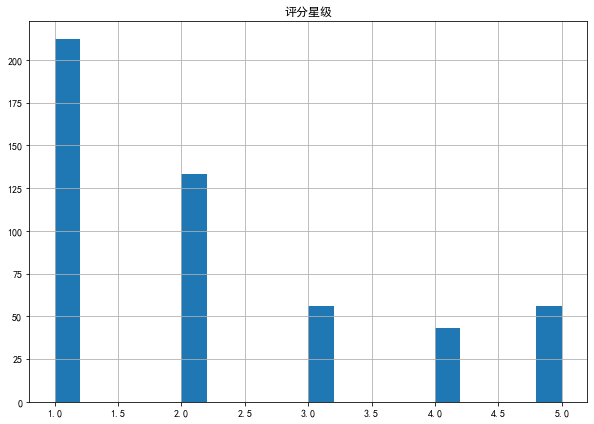

In [6]:
data.hist(u"评分星级",bins=20, figsize=(10,7))

In [7]:
# 将所有评论变为一个字符串
comments = ''
for k in range(len(data['评论内容'])):
    comments = comments +(str(data['评论内容'][k])).strip()
 
print(comments)

。很多场景都是平时会去的地方。在pachinko里和开卡丁车这个让人很惊喜，可以说是相当深入当地文化了。no 真的不行 冲着昊然弟弟和宝强同志的系列组合打及格 小林酱妈妈的故事真的体现了导演深深的直男癌情怀 女人为了给孩子吃饭就是出卖肉体 这种桥段演了一万年了tm不腻吗 笑贫不笑娼 你就是真的去卖 你能不能给估算下自己的价值和生活需求 就为一碗面 吃了这顿就没下顿 导演就觉得女性是这么低智商的存在本来想打四星，但自己看完之后觉得一星恶评也是离谱，就五星拉一把叭太难看了，狂玩手机，过年电影票还辣么贵，糟蹋日本帅哥美女演员了。那些打不及格的人认真的？？ 本来想给6.5分，那么多人尬黑，那我就8分吧陈思诚真的创造了一个唐探宇宙，好笑又好哭。

好喜欢长泽雅美啊，她那句，你不能对我负责为什么要把我带到这个世界来？

快哭晕在厕所里了。浪费了这么好的故事背景 拍了个不清不楚的密室 最后强行秀了个脸 真当自己建国大业莫名其妙这四个字用来形容这部电影真的最好不过了太烂了，不会有下次了，坑钱玩意！不尊重女性就这居然还有下一部？恰烂钱也不是这么恰的吧诸如此类的电影能大行其道，背后折射的是大部分观众审美的低下，当以后的银幕上全是这种风格的片子，我宁愿再也不踏入电影院比1和2都要好看。情节紧凑一环接一环，长泽雅美三浦友和我吹爆！！最后的彩蛋我鸡皮疙瘩都起来了………说好不剧透就是不能剧透，唐探4啥时候安排！！！唐探这盘棋，大的已经有些吓人了！
这一部无论是案件、场面还是格局，都远胜于第二部。
以悬疑推理引入，用动作冒险散展开，加喜剧元素娱乐，唐探这套模式在这一部中彻底成型，这也是唐探达到这种体量后的一种必然。
《唐探3》证明了，这个系列是能撑起如此大野心的，真的可以向外扩展出一个广阔的电影世界，甚至能真的打造出一个属于中国电影的自研“宇宙”。
总而言之，但凡看了《唐探3》，你就很难不期待《唐探4》会讲述怎样一个故事，又有哪些角色会加入其中，由谁扮演。对不住票钱。
真真的一部不如一部。
真是一坨屎也敢上春节档圈钱。客观摸良心 7分是有的 推理部分的确有点弱 但是日本几个演员确实演技厉害 停尸间桥段的节奏和梗都很不错 我就是有点奇怪 有几段剧情节奏和风格完全不同 是不是换了副导执拍的 总的来说谈不上惊喜 也谈不上失望 但是为了对抗无脑黑 我无脑地在这里给满分警察连瓶子的指纹都不查，尸检也查不到

In [8]:
# 使用正则表达式去标点和表情
pattern = re.compile(r'[\u4e00-\u9fa5]+')
filterdata = re.findall(pattern, comments)
cleaned_comments = ''.join(filterdata)
 
print(cleaned_comments)

影市场太好了希望这么好的市场能够孵化出一些世界一流的中国产电影而不是成就一些庸片中国还要能出一批世界一线的导演和演员明星要能够给全球电影市场带节奏否则这么好的市场白瞎了政治制度不同但各个社会里爱恨情仇的缘由人们的危机感很多都触及的是人类共同价值中国的国产电影加油啊看完这片比看完太空漫游需要更大的耐心人生有几个分钟我却拿来其中的一个分钟看了这部爆烂电影陈思诚你真的不行只是有几个烂钱肚子里却没有五毛的墨水请不要强行搞什么唐探宇宙了容不下你的还蛮想知道给了日本片方多少钱啊来演这种侮辱性极强的电影不过拿钱办事儿每个日本演员确实都认真完成工作了演技高光时刻基本都是人家贡献的长泽雅美那几分钟是真正的演技高光但是这个系列到第三部感觉完全跑偏了唐探已经是一个可以自我生长的系列了这一部对于春节档来说肯定及格了一边看电影一边打一星王宝强的装傻充愣已经到了恶心的地步充满了对他国文化的恶意揣测可惜了我长泽雅美女神花钱找罪受很好看啊不知道为啥这么多酸货中日演员大银幕演技大比武一星给染谷将太全剧最佳长泽雅美其他的是我期待太高了吗能不能不要再出来恶心人了是真的很难看啊我就说一点一个混到日本警视厅高层且如此有前途之人为了一个刘昊然放弃了自己的所有就很脑瘫胡搞的过期产品太差了对唐探这个多喜欢就多想对陈思诚说一句耗子尾汁希望他这部赚够钱了下一部能真正用点心要求不高唐探网剧前八集那个水平就行少接点植入广告少塞点资源咖毕竟电影这个商业艺术再商业它也得达到艺术门槛的最低限油腻低俗刘昊然你提高提高演技吧演的什么玩意儿全都是我喜欢的亚洲演员王宝强刘昊然就不不用说这俩老搭档都是熟面孔麻酱长泽雅美小七妻夫木聪三浦友和要颜值有颜值要实力有实力在一部电影里把亚洲国家的这些演员全部聚齐真的太难得了过年也没这么乱失望透顶王宝强演的太猥琐了导致我现在对他本人都很反感全程笑点离不开屎尿屁和下三滥的颜色废料作为女生真的笑不出来母亲为了一碗面被流氓欺辱这就是出轨导演的三观吗在这膈应谁呢刘昊然在电影一开始就提到了奥卡姆剃刀原则若无必要毋增实体整部电影都在违背这个原则以及陈思诚你有没有想过如果你想了一个密室案子它不属于密室讲义的种它有没有可能就就不是密室这次的笑点更加密集四个侦探三国语言辩论的那段太好笑了而且老歌系列又出新曲路边的野花不要采配上长泽雅美有一种奇怪的笑点我笑到全场最大声如果早知道会出现和平精英五人组我不会买票的这电影前后

In [9]:
# 分词
segment = jieba.lcut(cleaned_comments)
words_df=pd.DataFrame({'segment':segment})
 
words_df.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\quzhe\AppData\Local\Temp\jieba.cache
Loading model cost 0.971 seconds.
Prefix dict has been built successfully.


,segment
0,我
1,从来
2,没
3,看过
4,这


In [10]:
# 去停用词
stopwords=pd.read_csv("stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')#quoting=3全不引用
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]
 
words_df.head(10)

,segment
1,从来
2,没
3,看过
5,样子
6,无耻
9,电影
10,里
11,插入
12,广告
14,行为


In [11]:
# 词频统计
import numpy 
 
words_stat=words_df.groupby(by=['segment'])['segment'].agg([("计数",numpy.size)])
words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False)
 
words_stat.head(10)

,segment,计数
3222,电影,183
160,不,123
3308,看,112
3349,真的,108
2668,有,106
2387,推理,103
441,人,96
4417,陈思诚,95
1264,唐探,91
875,到,79


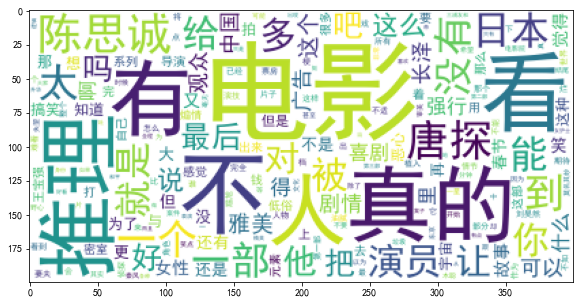

In [12]:
# 词云显示
import matplotlib.pyplot as plt
%matplotlib inline
 
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
from wordcloud import WordCloud#词云包
from wordcloud import WordCloud,ImageColorGenerator # 词云包
 
wordcloud=WordCloud(font_path="simhei.ttf",background_color="white",max_font_size=80) #指定字体类型、字体大小和字体颜色
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
word_frequence_list = []
for key in word_frequence:
    temp = (key,word_frequence[key])
    word_frequence_list.append(temp)
 
wordcloud=wordcloud.fit_words(word_frequence)
 
#image_colors = ImageColorGenerator(bg_pic) # 根据图片生成词云颜色
plt.imshow(wordcloud)
wordcloud.to_file('shishenling.png')  # 把词云保存下来